In [262]:
# find a polynomial that interpolates the five points:
# (0, 1), (1, 2), (2, 2), (3, 6), (4, 9)


In [61]:
px = [0 1 2 3 4]
py = [1 2 2 6 9]
n = length(px)


5

In [62]:
A = zeros(n, n)
for i = 1:n
    A[:, i] = px.^(i-1)
end
A

5×5 Array{Float64,2}:
 1.0  0.0   0.0   0.0    0.0
 1.0  1.0   1.0   1.0    1.0
 1.0  2.0   4.0   8.0   16.0
 1.0  3.0   9.0  27.0   81.0
 1.0  4.0  16.0  64.0  256.0

In [63]:
c = A\py'

5×1 Array{Float64,2}:
  1.0
  5.666666666666661
 -7.583333333333332
  3.3333333333333335
 -0.4166666666666667

In [64]:
using Plots

In [65]:
x = range(-1,5, length=100)


-1.0:0.06060606060606061:5.0

In [66]:
y(x) = c[3] + c[2]x + c[1]x.^2


y (generic function with 1 method)

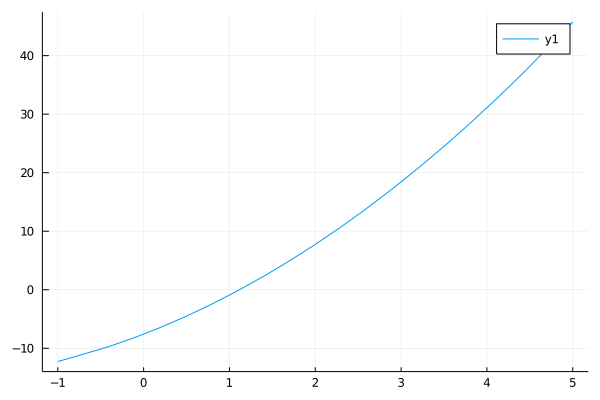

In [67]:
plot(y, -1, 5)

In [8]:
itp_x = 0:6

0:6

In [9]:
itp_y(x) = sin.(x)

itp_y (generic function with 1 method)

In [10]:
# using Pkg
# Pkg.add("DataInterpolations")
using DataInterpolations

In [11]:
A = [itp_y(n) for n = itp_x]

7-element Array{Float64,1}:
  0.0
  0.8414709848078965
  0.9092974268256817
  0.1411200080598672
 -0.7568024953079282
 -0.9589242746631385
 -0.27941549819892586

In [12]:
[x for x = itp_x]

7-element Array{Int64,1}:
 0
 1
 2
 3
 4
 5
 6

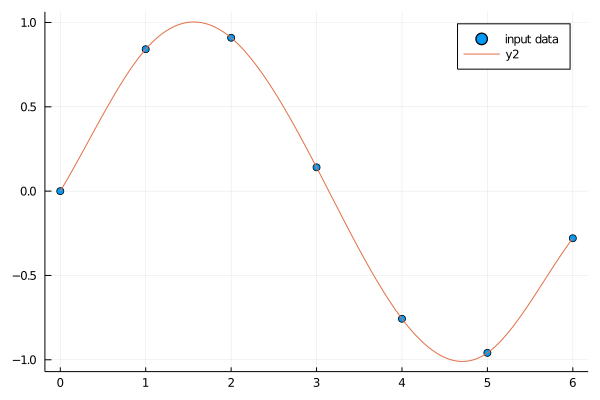

In [13]:
itp1 = CubicSpline(itp_y(itp_x), itp_x)
scatter(itp_x, itp_y(itp_x), label="input data")
plot!(itp1)

In [14]:
#

In [15]:
xy = [ 1 1; 1.9 1; 2.5 1.1; 3 1.6; 4 2; 7 3.45]

6×2 Array{Float64,2}:
 1.0  1.0
 1.9  1.0
 2.5  1.1
 3.0  1.6
 4.0  2.0
 7.0  3.45

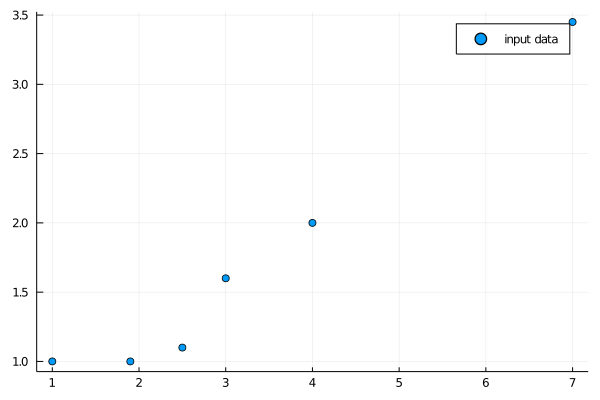

In [16]:
scatter(xy[:, 1], xy[:, 2], label="input data")

In [17]:
X = sum(xy[:, 1])

19.4

In [18]:
Y = sum(xy[:, 2])

10.15

In [19]:
W = sum(xy[:, 1].*xy[:,1])

84.86

In [20]:
Z = sum(xy[:, 1].*xy[:,2])

42.60000000000001

In [21]:
n = size(xy)[1]

6

In [22]:
A = [n X; X W]

2×2 Array{Float64,2}:
  6.0  19.4
 19.4  84.86

In [23]:
b = [Y;Z]

2-element Array{Float64,1}:
 10.15
 42.60000000000001

In [24]:
a = A \ b

2-element Array{Float64,1}:
 0.26271837349397464
 0.4419427710843377

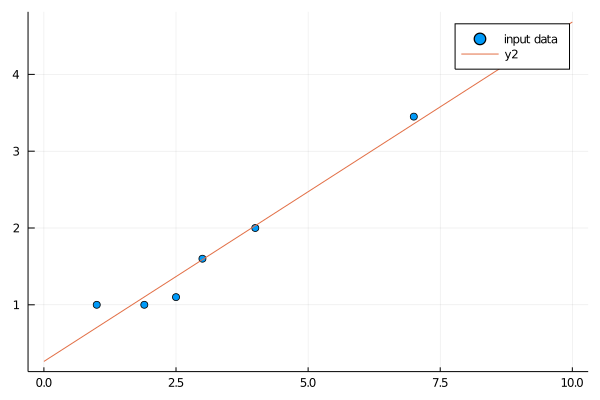

In [25]:
y(x) = a[1] + a[2]*x
scatter(xy[:, 1], xy[:, 2], label="input data")
plot!(y, 0, 10)

In [26]:
# Curves of best fit
# exponential: y = be^(mx)
# inverse: y = 1/(mx+b)
# power: y = bx^m

# transform:
# exponential: (x, log(y))
    # log(y) = log(b) + mx
    # x vs log(y)
# inverse: (x, 1/y)
    # y^-1 = mx + b
    # x vs y^-1
# power: 
    # log(y) = log(b) + m*log(x)
    # log(x) vs log(y)

# linearize -> line of best filter

# transform back
# exponential: e^(log(y)) = e^(ao + a1x) = e^a0*e^a1x


In [27]:
xy = [
.25 .3662;
.5 .4506;
.75 .5054;
1 .5694;
1.25 .6055;
1.5 .6435;
1.75 .7426;
2 .9068;
2.25 .9393;
2.5 1.1297;
2.75 1.2404;
3 1.4441;
3.25 1.5313;
3.5 1.7706;
3.75 1.9669;
4 2.3129;
4.25 2.5123;
4.5 2.9238;
4.75 3.307;
]

19×2 Array{Float64,2}:
 0.25  0.3662
 0.5   0.4506
 0.75  0.5054
 1.0   0.5694
 1.25  0.6055
 1.5   0.6435
 1.75  0.7426
 2.0   0.9068
 2.25  0.9393
 2.5   1.1297
 2.75  1.2404
 3.0   1.4441
 3.25  1.5313
 3.5   1.7706
 3.75  1.9669
 4.0   2.3129
 4.25  2.5123
 4.5   2.9238
 4.75  3.307

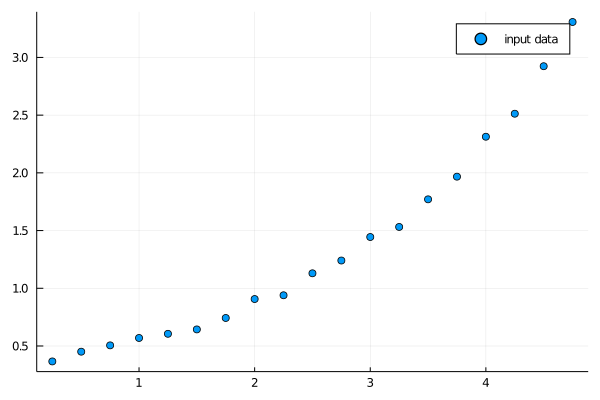

In [28]:
scatter(xy[:, 1], xy[:, 2], label="input data")

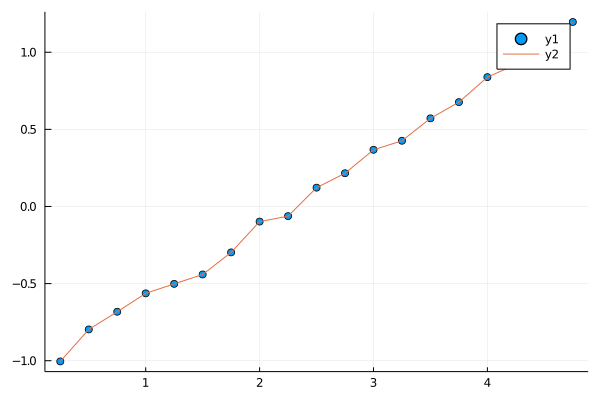

In [29]:
# this one is linear:
scatter((xy[:, 1]), log.(xy[:, 2]))
plot!(xy[:, 1], log.(xy[:, 2]))

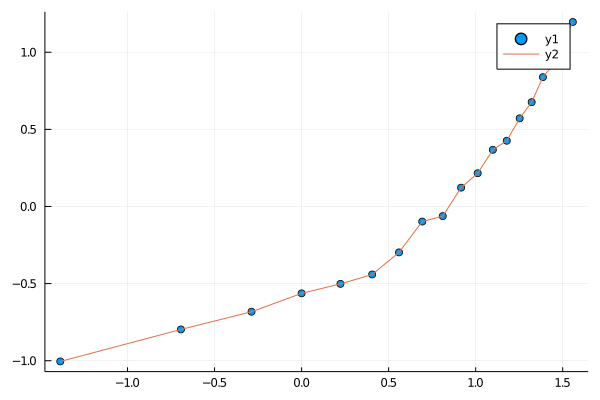

In [30]:
# not this one, isn't linear:
scatter(log.(xy[:, 1]), log.(xy[:, 2]))
plot!(log.(xy[:, 1]), log.(xy[:, 2]))

In [31]:
# so it's an exponential function

In [32]:
trans_x = xy[:, 1]
trans_y = xy[:, 2]
X = sum(trans_x)
Y = sum(log.(trans_y))
W = sum(trans_x.^2)
Z = sum(trans_x.*log.(trans_y))
n = size(trans_x)[1]
A = [n X; X W]
b = [Y; Z]
a = A \ b
# -> log(y) = -1.0849 + 0.4752x

2-element Array{Float64,1}:
 -1.0849491985680522
  0.47523187744400863

In [33]:
y(x) = exp(a[1])*exp(a[2].*x)

y (generic function with 1 method)

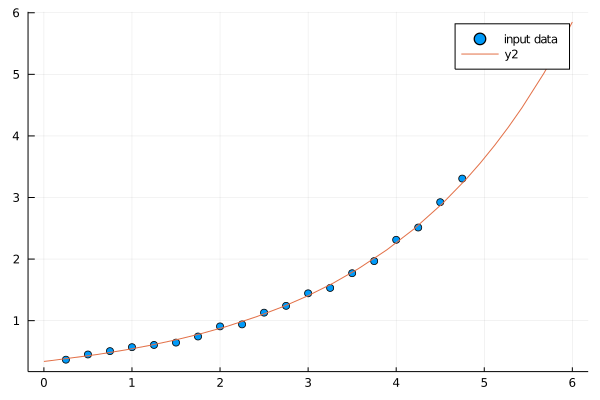

In [34]:
scatter(xy[:, 1], xy[:, 2], label="input data")
plot!(y, 0, 6)